In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

#### Sequantial API

In [5]:
def build_model_with_sequantial():
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                           tf.keras.layers.Dense(units=128, activation='relu'),
                                           tf.keras.layers.Dense(units=10, activation='softmax')])
    return seq_model

#### Functional API

In [9]:
def build_model_with_functional():
    from tensorflow.keras.models import Model
    
    #Instanciate the input tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(units=128, activation='relu')(flatten_layer)
    output_layer = tf.keras.layers.Dense(units=10, activation='softmax')(first_dense)
    
    func_model = Model(inputs=[input_layer], outputs=[output_layer])
    return func_model

#### Build Model and visualize the model graph

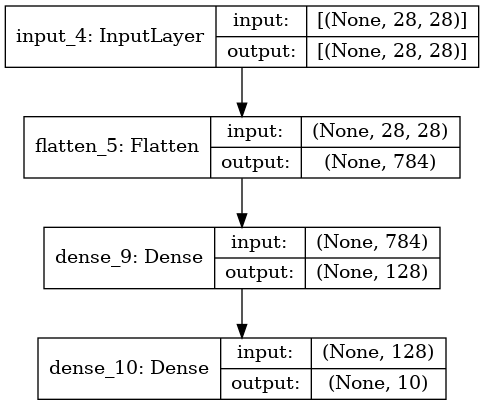

In [13]:
#model = build_model_with_sequantial()
model = build_model_with_functional()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

#### Training and Evaluating the model

In [16]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6274 - accuracy: 0.7800
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.8737
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.8848
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3557 - accuracy: 0.8736


[0.35566481947898865, 0.8736000061035156]

#### Multi outputs Model with Functional API

In [30]:
def multi_output_model_with_functional():
    from tensorflow.keras.models import Model
    
    input_layer = tf.keras.Input(shape=8)
    
    first_dense = tf.keras.layers.Dense(units=128, activation='relu')(input_layer)
    second_dense = tf.keras.layers.Dense(units=128, activation='relu')(first_dense)
    
    first_output = tf.keras.layers.Dense(units=1)(second_dense)
    
    third_dense = tf.keras.layers.Dense(units=128, activation='relu')(second_dense)
    second_output = tf.keras.layers.Dense(units=1)(third_dense)
    
    model = Model(inputs=[input_layer], outputs=[first_output, second_output])
    return model

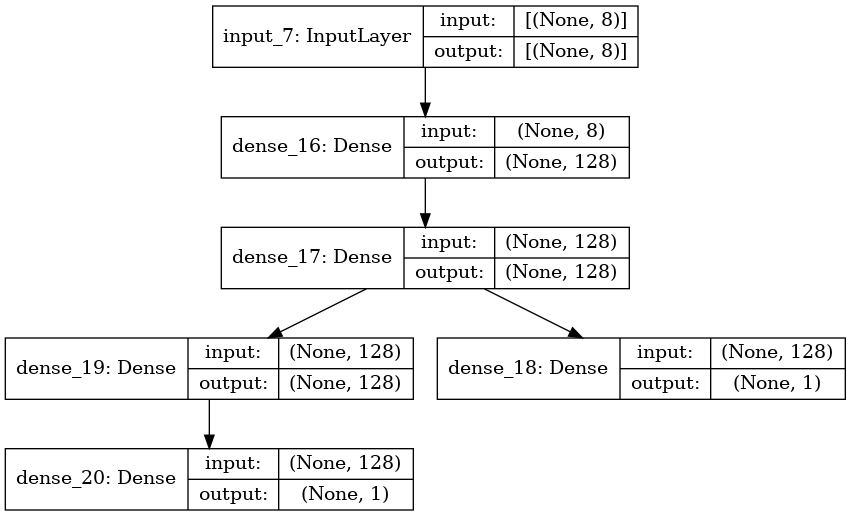

In [31]:
model = multi_output_model_with_functional()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_model.png')